# Assignment 1: Data Exploration
    By Reva Sandhir

Objective: The purpose of this assignment is to test your ability to prepare data and organize data, conduct exploratory analysis, identify key business insights, and make relevant recommendations for improvement.

Business Context:

StreamFlow, a subscription-based content streaming platform, has been facing a significant issue with subscriber churn, with the largest volume of churners in its 'Standard' tier. Despite offering a diverse range of content and competitive pricing, there has been an observable trend where many users either downgrade to the 'Basic' tier after a few months or leave the service entirely. The company wants to understand the factors contributing to churn, and identify opportunities to drive improved retention. Further, they want to build a business case to implement retention improvement initiatives by estimating the impact to key business metrics.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/refs/heads/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [25]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [29]:
df.describe

<bound method NDFrame.describe of      User_ID  Age  Gender Location     Subscription_Start_Date  \
0          1   56   Other  Central  2020-06-07 01:53:37.656934   
1          2   69   Other     West  2024-02-21 01:53:37.656980   
2          3   46  Female    North  2022-10-06 01:53:37.656995   
3          4   32  Female     East  2022-01-04 01:53:37.657006   
4          5   60  Female    North  2020-03-13 01:53:37.657017   
..       ...  ...     ...      ...                         ...   
995      996   25   Other     East  2020-10-26 01:53:37.667884   
996      997   66  Female     West  2020-05-06 01:53:37.667895   
997      998   52   Other    South  2019-06-19 01:53:37.667906   
998      999   69    Male     East  2020-11-13 01:53:37.667917   
999     1000   32    Male    North  2022-07-10 01:53:37.667930   

    Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0             Premium            19.99    Credit Card              31.513153   
1            

In [35]:
# Check for missing values in each column
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

Insight: date_of_churn and reason_for_churb have a large number of missing values (754).

In [36]:
# for non churned users, drop the churn-related columns or leave them as NaN
df.loc[df['Churned'] == 0, 'Date_of_Churn'] = np.nan
df.loc[df['Churned'] == 0, 'Reason_for_Churn'] = np.nan

In [40]:
# check for duplicate rows
duplicates = df.duplicated().sum()

# remove duplicates if any
df = df.drop_duplicates()

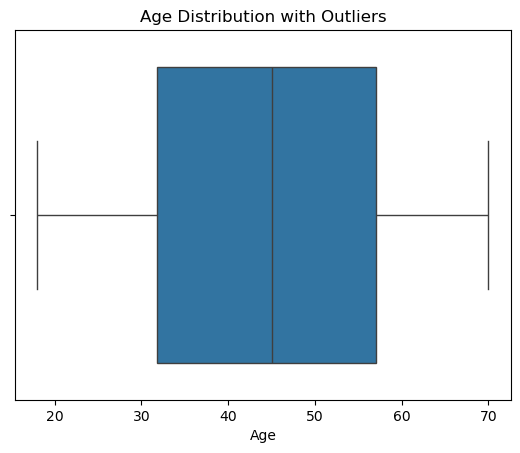

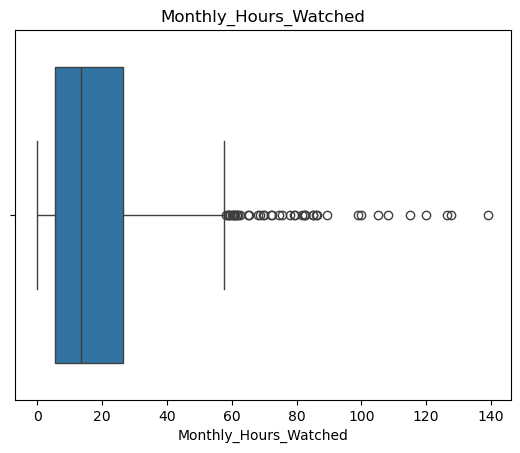

In [41]:
# boxplot for detecting outliers
sns.boxplot(x=df['Age'])
plt.title('Age Distribution with Outliers')
plt.show()

sns.boxplot(x=df['Monthly_Hours_Watched'])
plt.title('Monthly_Hours_Watched')
plt.show()

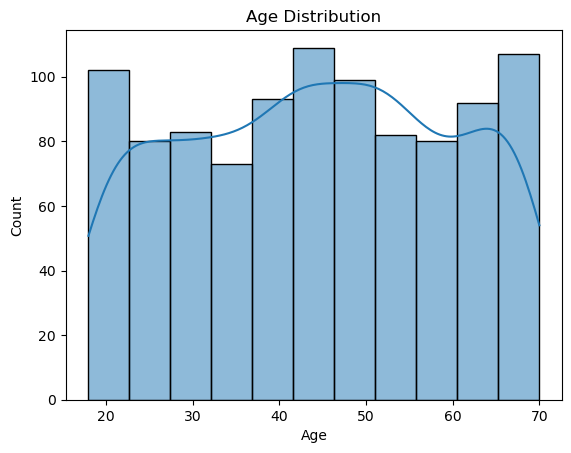

In [44]:
# Ensure Age is within a reasonable range (e.g., 18 to 100 years)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

converting categorical variables 

In [1]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Location', 'Subscription_Type', 'Favorite_Genre'], drop_first=True)


NameError: name 'pd' is not defined